In [1]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

import numpy as np
import pandas as pd
import cv2

     |████████████████████████████████| 60.4 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
def shear(image,degree,direction):
  res = np.zeros((2*image.shape[0],2*image.shape[1],3))

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      v = (i - image.shape[1]/2)
      w = (j - image.shape[0]/2)
      if(direction=="y"):
        x = v 
        y = w + v*degree
      elif(direction=="x"):
        x = v + w*degree 
        y = w  
      res[int(y + res.shape[0]/2),int(x + res.shape[1]/2)]=image[j,i]     
  return res


def scale(image,qX,qY):

  res = np.zeros((image.shape[0],image.shape[1],3))
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      v = i - image.shape[1]/2
      w = j - image.shape[0]/2
      x = v*qX
      y = w*qY
      res[int(y + res.shape[0]/2), int( x + res.shape[1]/2)] = image[j,i]
  return res

def merge(image,x,y,cube):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      newX = int(x-(image.shape[0]/2)+i)
      newY = int(y-(image.shape[1]/2)+j)
      if(newX>=0 and newX<cube.shape[0] and newY>=0 and newY<cube.shape[1]):
        if(np.all(image[i,j])):
         cube[newX,newY]= image[i,j]
  # cv2_imshow(cube)
  return cube    




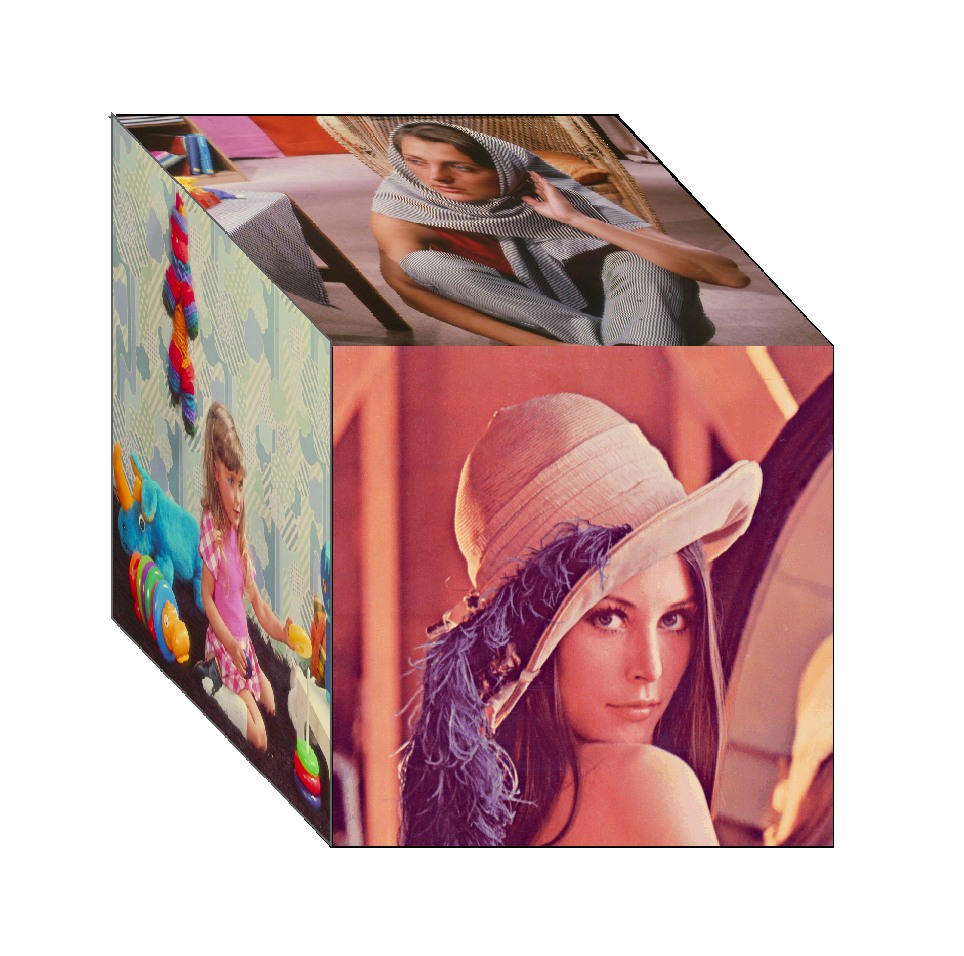

<class 'numpy.ndarray'>
(415, 406) (394, 369)
(415, 406)


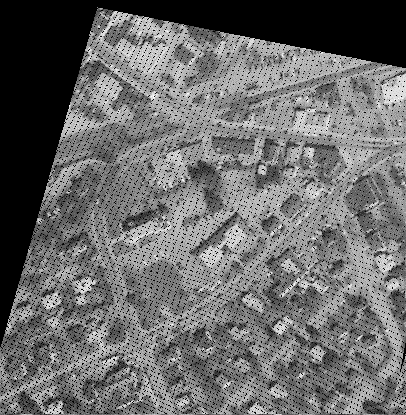

In [3]:
# # # 1.
 
cube=cv2.imread("Cube.png")
# cube = cv2.cvtColor(cube,cv2.COLOR_BGR2GRAY)
# 1.1
lena = cv2.imread("lena.bmp")
# lena = cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)

girl = cv2.imread("girl.bmp")
# girl= cv2.cvtColor(girl,cv2.COLOR_BGR2GRAY)
barbara = cv2.imread("barbara.bmp")


sheared_barbara = shear(barbara,0.43,"x")
scaled_barbara = scale(sheared_barbara,.99,0.45)
cube = merge(scaled_barbara,232,472,cube)


#  scaling lena:
scaling = [[0.9765625,0,0],[0,0.9765625,0],[0,0,1]]
lena_scaled = np.zeros((512,512,3))
barbara_scaled = np.zeros((1000,1000,3))

for i in range(501):
  for j in range(501):
    for k in range(3):
      lena_scaled[i][j][k]= lena[int(i*0.9765625)][int(j*0.9765625)][k]

for i in range(500):
  for j in range(500):
    for k in range(3):
      cube[346+i,333+j,k]=lena_scaled[i][j][k]


image = shear(girl,0.45,"y")
image2 = scale(image,0.43,0.99)
result = merge(image2,481,222,cube)
cv2_imshow(result)

im = Image.open("Map1.gif")
im.seek(0)
im.save("map1.png")

im = Image.open("Map2.gif")
im.seek(0)
im.save("map2.png")


map1 = cv2.imread("map1.png")
map1 = cv2.cvtColor(map1,cv2.COLOR_BGR2GRAY)
map2 = cv2.imread("map2.png")
map2 = cv2.cvtColor(map2,cv2.COLOR_BGR2GRAY)
print(type(map1))
print(map1.shape,map2.shape)

def line_interpolation_map(v,w):
  y = 0.97153*v-0.29462*w+0.00028696*v*w+97.625
  if y > 405:
    y = 405
  x = 0.1915*v+1.0358*w-0.0001089*w*v+7.9987 
  if x > 414:
    x = 414
  return x,y 

map12 = np.zeros((415,406))
print(map12.shape)

for i in range(394):
  for j in range(369):
    x,y = line_interpolation_map(j,i)
    map12[int(x)][int(y)] = map2[i][j] 

cv2_imshow(map12)